In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Class resource:/My rough/math-for-machine-learning-main/4_mean_percentile/income.csv", names=["name","income"], skiprows=[0])
df

,name,income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000
6,Elon Musk,10000000


In [4]:
df.income.describe()

,income
count,7.000000e+00
mean,1.433929e+06
std,3.777283e+06
min,4.000000e+03
25%,5.500000e+03
50%,7.000000e+03
75%,7.750000e+03
max,1.000000e+07


In [5]:
df.income.quantile(0)

np.float64(4000.0)

In [6]:
df.income.quantile(0.25,interpolation="higher")

np.int64(6000)

In [7]:
df.income.quantile(0.5,interpolation="higher")

np.int64(7000)

In [8]:
df.income.quantile(0.75)

np.float64(7750.0)

In [9]:
df.income.quantile(1)

np.float64(10000000.0)

In [10]:
percentile_99 = df.income.quantile(0.99)
percentile_99

np.float64(9400479.999999994)

In [11]:
df[df.income>percentile_99]

,name,income
6,Elon Musk,10000000


In [12]:
df

,name,income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000
6,Elon Musk,10000000


In [15]:
df['income'][3] = np.nan

In [16]:
df

,name,income
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,NaN
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,10000000.0


In [17]:
df.income.mean()

np.float64(1671666.6666666667)

In [18]:
df_new = df.fillna(df.income.mean())
df_new

,name,income
0,Rob,5.000000e+03
1,Rafiq,6.000000e+03
2,Nina,4.000000e+03
3,Sofia,1.671667e+06
4,Mohan,8.000000e+03
5,Tao,7.000000e+03
6,Elon Musk,1.000000e+07


In [19]:
df_new = df.fillna(df.income.median())
df_new

,name,income
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,6500.0
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,10000000.0


In [20]:
print(df.columns)


Index(['name', 'income'], dtype='object')



📌 **Statistical Summary:**
Mean: 1433928.5714285714
Median: 7000.0
Mode: 4000
Q1 (25th Percentile): 5500.0
Q3 (75th Percentile): 7750.0
IQR: 2250.0
Outlier Boundaries: Below 2125.0 or Above 11125.0
Outliers Detected: [np.int64(10000000)]
Skewness: 2.0412408576839116


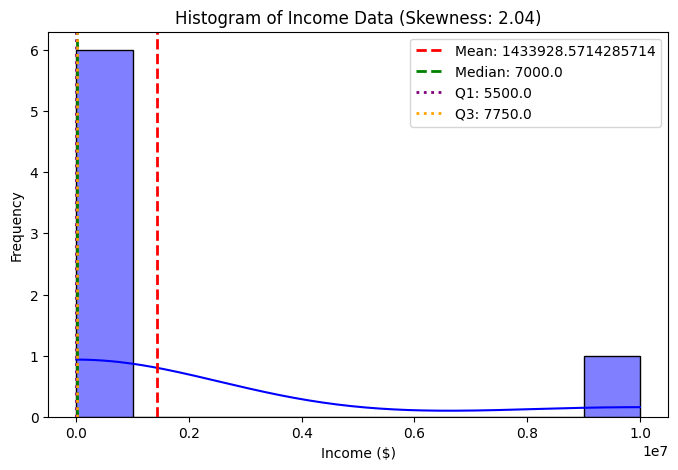

In [21]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, mode



# Sample dataset (Income values with an Outlier)
income_data = np.array([4000, 5000, 6000, 7000, 7500, 8000, 10000000])  # Sorted Data

# Convert to Pandas DataFrame for better analysis
df = pd.DataFrame(income_data, columns=["Income"])

# ✅ Calculate Mean, Median, and Mode
mean_value = np.mean(income_data)
median_value = np.median(income_data)
mode_value = mode(income_data, keepdims=True).mode[0]  # Fix applied for mode

# ✅ Calculate Q1 (25th Percentile) and Q3 (75th Percentile)
Q1 = np.percentile(income_data, 25)
Q3 = np.percentile(income_data, 75)

# ✅ Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# ✅ Define Outlier Boundaries
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# ✅ Detect Outliers
outliers = [x for x in income_data if x < lower_bound or x > upper_bound]

# ✅ Calculate Skewness
skewness_value = skew(income_data)

# ✅ Print Summary of Statistics
print("\n📌 **Statistical Summary:**")
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Q1 (25th Percentile): {Q1}")
print(f"Q3 (75th Percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Outlier Boundaries: Below {lower_bound} or Above {upper_bound}")
print(f"Outliers Detected: {outliers if outliers else 'None'}")
print(f"Skewness: {skewness_value}")

# ✅ Plot Histogram to Show Skewness and Outliers
plt.figure(figsize=(8,5))
sns.histplot(income_data, bins=10, kde=True, color='blue')

# Marking Mean, Median, and Quartiles
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value}")
plt.axvline(Q1, color='purple', linestyle='dotted', linewidth=2, label=f"Q1: {Q1}")
plt.axvline(Q3, color='orange', linestyle='dotted', linewidth=2, label=f"Q3: {Q3}")

plt.title(f"Histogram of Income Data (Skewness: {skewness_value:.2f})")
plt.xlabel("Income ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


**Histogram with KDE (Kernel Density Estimate).**

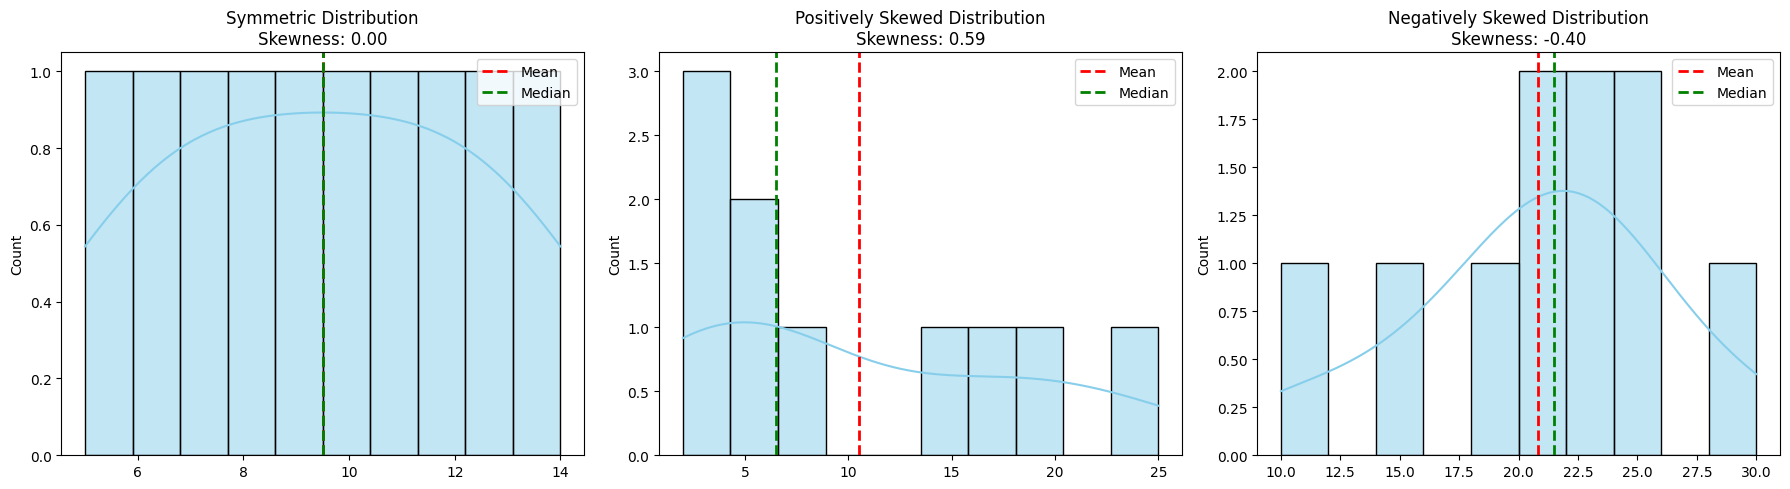

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Define the datasets
symmetric_data = np.array([5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
positive_skew_data = np.array([2, 3, 4, 5, 6, 7, 15, 18, 20, 25])
negative_skew_data = np.array([10, 15, 18, 20, 21, 22, 23, 24, 25, 30])

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot distributions
for ax, data, title in zip(
    axes,
    [symmetric_data, positive_skew_data, negative_skew_data],
    ["Symmetric Distribution", "Positively Skewed Distribution", "Negatively Skewed Distribution"]
):
    sns.histplot(data, kde=True, bins=10, ax=ax, color="skyblue")
    ax.axvline(np.mean(data), color='red', linestyle='dashed', linewidth=2, label="Mean")
    ax.axvline(np.median(data), color='green', linestyle='dashed', linewidth=2, label="Median")
    ax.set_title(f"{title}\nSkewness: {skew(data):.2f}")
    ax.legend()

# Show the plots
plt.tight_layout()
plt.show()


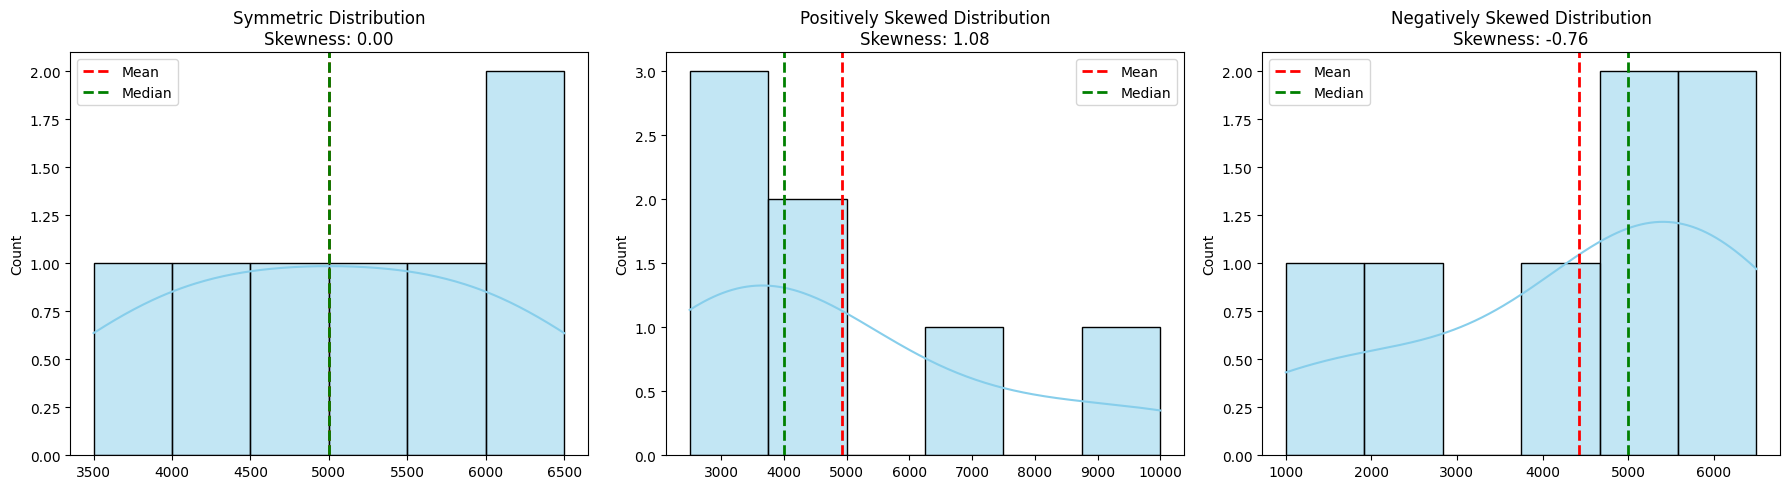

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Define the updated datasets
symmetric_income = np.array([3500, 4000, 4500, 5000, 5500, 6000, 6500])
positive_skew_income = np.array([2500, 3000, 3500, 4000, 4500, 7000, 10000])
negative_skew_income = np.array([1000, 2500, 4500, 5000, 5500, 6000, 6500])

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot distributions
for ax, data, title in zip(
    axes,
    [symmetric_income, positive_skew_income, negative_skew_income],
    ["Symmetric Distribution", "Positively Skewed Distribution", "Negatively Skewed Distribution"]
):
    sns.histplot(data, kde=True, bins=6, ax=ax, color="skyblue")
    ax.axvline(np.mean(data), color='red', linestyle='dashed', linewidth=2, label="Mean")
    ax.axvline(np.median(data), color='green', linestyle='dashed', linewidth=2, label="Median")
    ax.set_title(f"{title}\nSkewness: {skew(data):.2f}")
    ax.legend()

# Show the plots
plt.tight_layout()
plt.show()


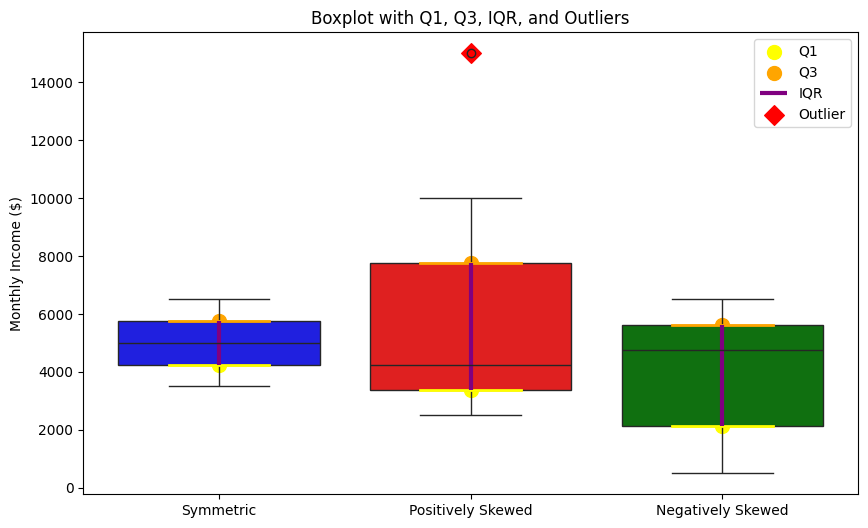

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define dataset with outliers
data = {
    "Symmetric": np.array([3500, 4000, 4500, 5000, 5500, 6000, 6500]),
    "Positively Skewed": np.array([2500, 3000, 3500, 4000, 4500, 7000, 10000, 15000]),  # Outlier: 15000
    "Negatively Skewed": np.array([500, 1000, 2500, 4500, 5000, 5500, 6000, 6500])  # Outlier: 500
}

# Create figure
plt.figure(figsize=(10, 6))

# Create Boxplot
ax = sns.boxplot(data=list(data.values()), palette=["blue", "red", "green"])

# Add Q1, Q3, IQR, and Outliers manually
for i, key in enumerate(data.keys()):
    dataset = data[key]

    # Compute Q1, Q3, IQR
    Q1 = np.percentile(dataset, 25)
    Q3 = np.percentile(dataset, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = dataset[(dataset < lower_bound) | (dataset > upper_bound)]

    # Plot Q1, Q3, IQR lines
    plt.scatter(i, Q1, color="yellow", marker="o", s=100, label="Q1" if i == 0 else "")
    plt.scatter(i, Q3, color="orange", marker="o", s=100, label="Q3" if i == 0 else "")
    plt.plot([i - 0.2, i + 0.2], [Q1, Q1], color="yellow", linewidth=2)  # Q1 line
    plt.plot([i - 0.2, i + 0.2], [Q3, Q3], color="orange", linewidth=2)  # Q3 line

    # Plot IQR box
    plt.vlines(i, Q1, Q3, color="purple", linewidth=3, label="IQR" if i == 0 else "")

    # Highlight outliers
    plt.scatter([i] * len(outliers), outliers, color="red", marker="D", s=100, label="Outlier" if i == 0 else "")

# Customize plot
plt.xticks(ticks=[0, 1, 2], labels=data.keys())  # Assign category labels
plt.ylabel("Monthly Income ($)")
plt.title("Boxplot with Q1, Q3, IQR, and Outliers")

# Show legend only once
plt.legend()

# Display plot
plt.show()
